In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#load the dataset
diabetes_df = pd.read_csv('diabetes.csv')

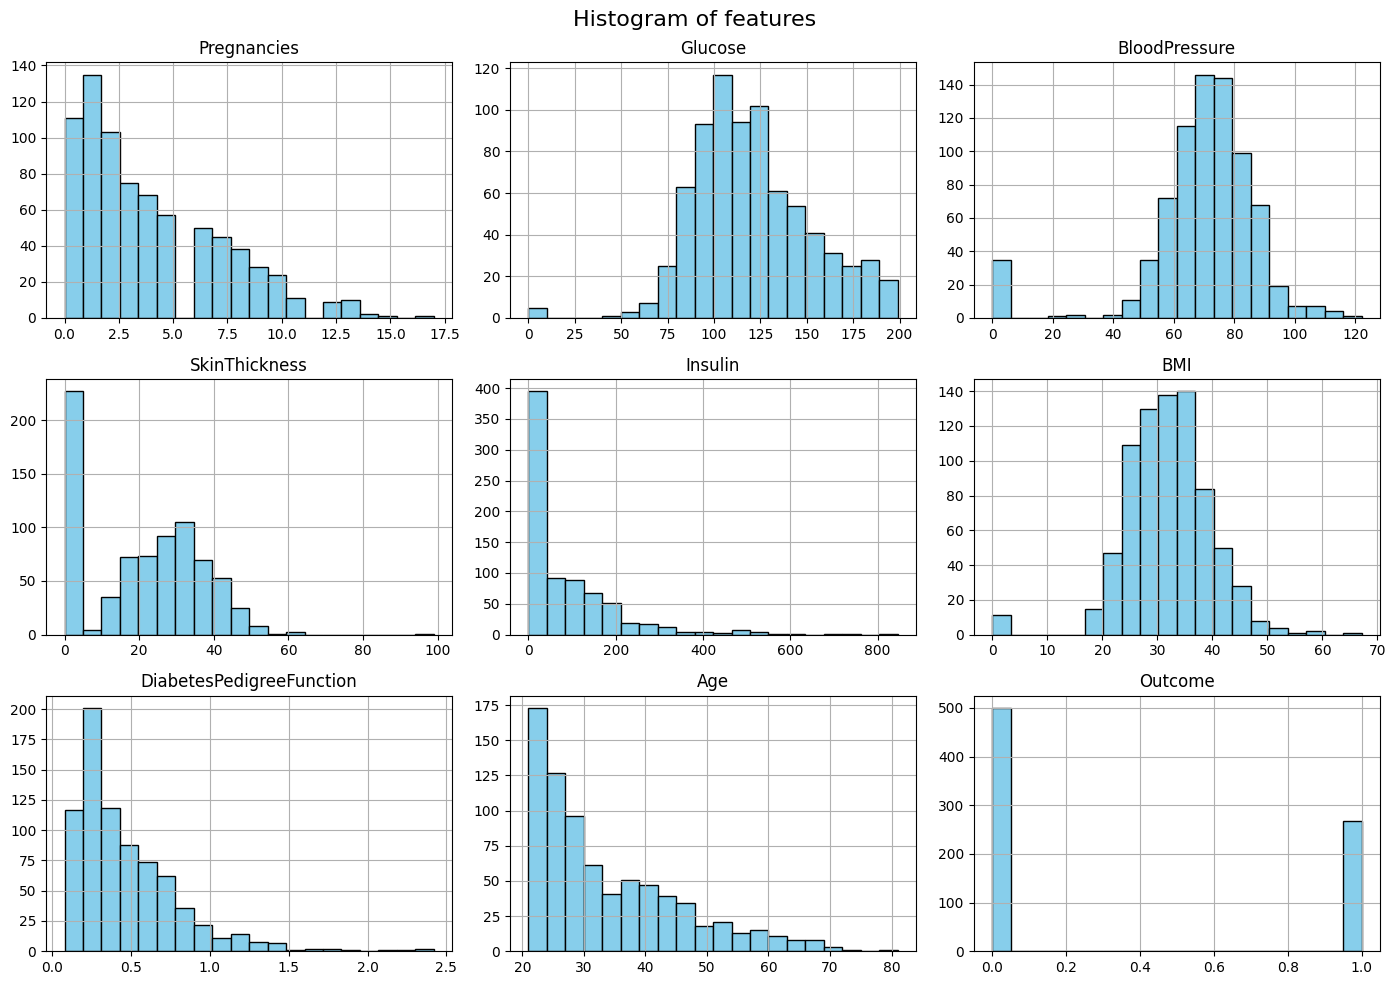

In [5]:
#Histogram (Distribution of Data)
#Purpose: Histograms help us understand the distribution of a
# single variable — whether it's normal, skewed, or has outliers.

diabetes_df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogram of features', fontsize=16)
plt.tight_layout()
plt.show()

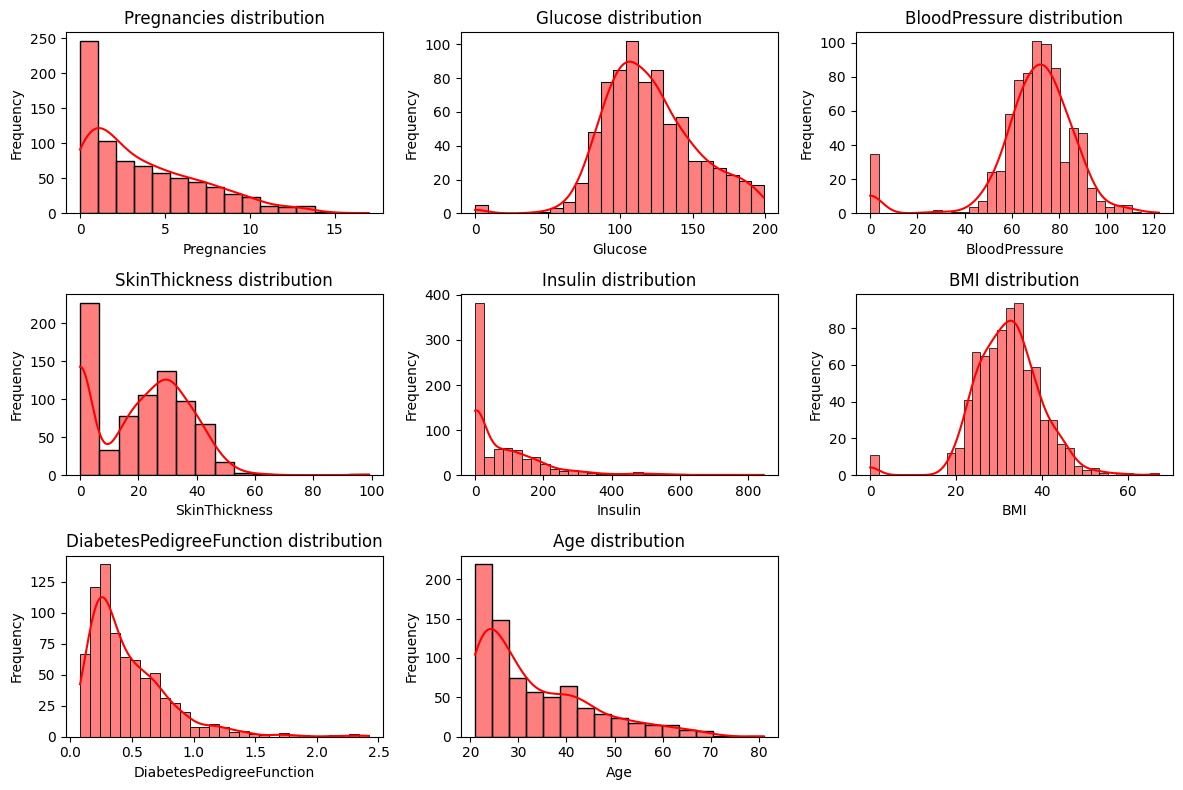

In [6]:
plt.figure(figsize=(12,8))
for i, col in enumerate(diabetes_df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.histplot(data=diabetes_df, x=col, kde=True, color='red')
    plt.title(f'{col} distribution')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

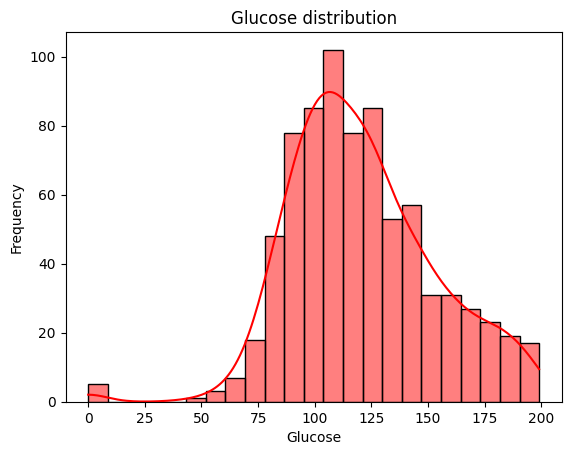

In [7]:
sns.histplot(data=diabetes_df, x='Glucose', kde=True, color='red')
plt.title('Glucose distribution')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Interpretation:
# Glucose and BMI usually have a normal or slightly right-skewed distribution.
# Insulin and SkinThickness often show right skewness, with many zero values — potential for missing or imputed data.
# Pregnancies and Age show discrete distributions (Age more continuous).

#Outcome is binary (0 = No diabetes, 1 = Diabetes)

In [9]:
#Boxplot (Detecting Outliers)
# Purpose: Boxplots reveal the spread of the data, the median, and potential outliers
# (those outside 1.5×IQR).

In [10]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

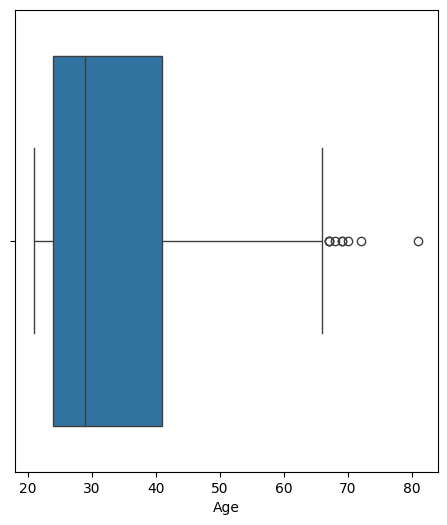

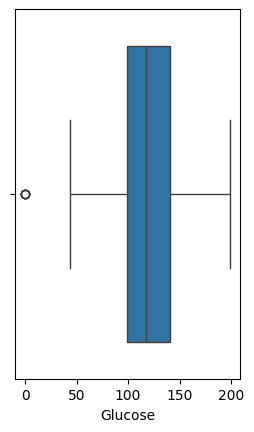

In [11]:
# Subplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x=diabetes_df['Age'])
plt.show()

plt.subplot(1,2,2)
sns.boxplot(x=diabetes_df['Glucose'])
plt.show()


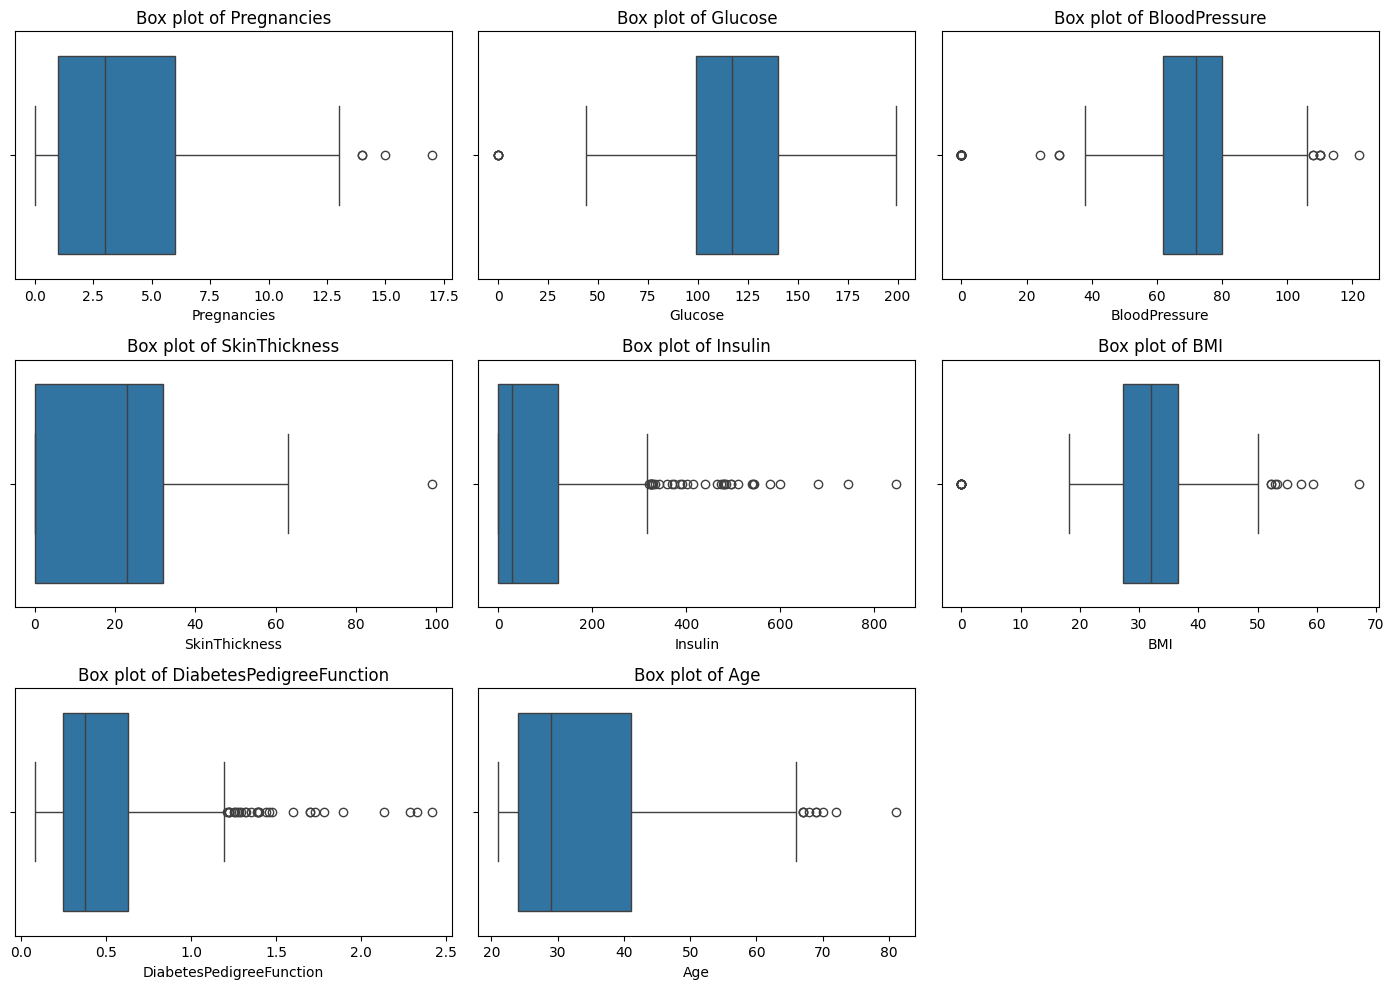

In [12]:
plt.figure(figsize=(14,10))
for i, col in enumerate(diabetes_df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=diabetes_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [13]:
#Interpretation:
# Insulin, SkinThickness, and BMI may have many outliers (values far from the median).

# Outliers can distort machine learning models like linear regression or SVM — consider capping or transformation.

# Zero values in features like Glucose, BloodPressure, and BMI could indicate missing data that needs imputation.

In [14]:
#Scatter Plot (Relationships Between Variables)
# Purpose: Scatter plots help detect linear or non-linear relationships between two features or between a feature and the target variable.

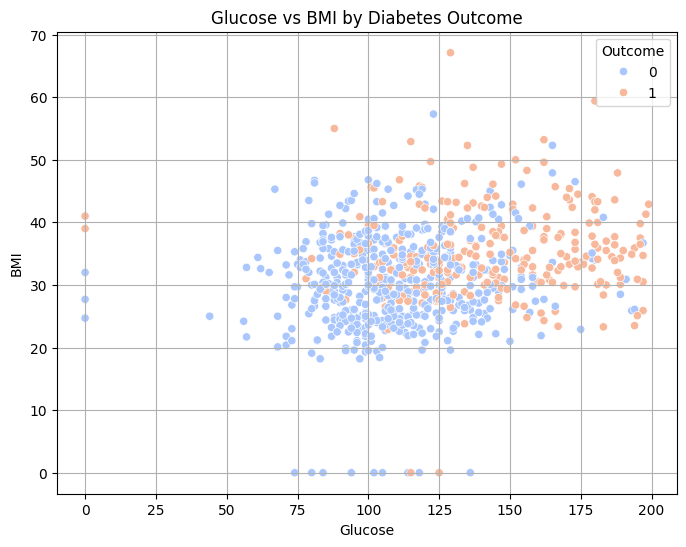

In [15]:
#  Scatter plot between Glucose and BMI colored by Outcome.
plt.figure(figsize=(8,6))
sns.scatterplot(data= diabetes_df, x='Glucose', y='BMI', palette='coolwarm', hue='Outcome')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

In [16]:
# Interpretation:
# We may see that people with higher Glucose and BMI values tend to be classified as diabetic (Outcome = 1).

# This shows a positive association between these features and diabetes, making them good candidates for model training.

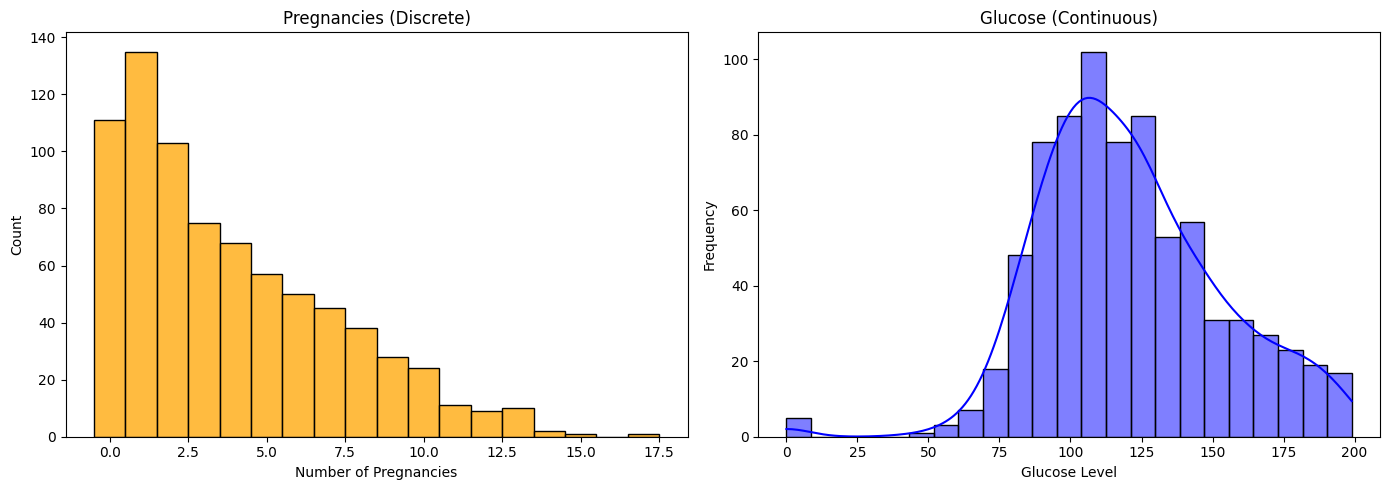

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Discrete
sns.histplot(diabetes_df['Pregnancies'], discrete=True, ax=axs[0], color='orange')
axs[0].set_title('Pregnancies (Discrete)')
axs[0].set_xlabel('Number of Pregnancies')
axs[0].set_ylabel('Count')

# Continuous
sns.histplot(diabetes_df['Glucose'], kde=True, ax=axs[1], color='blue')
axs[1].set_title('Glucose (Continuous)')
axs[1].set_xlabel('Glucose Level')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


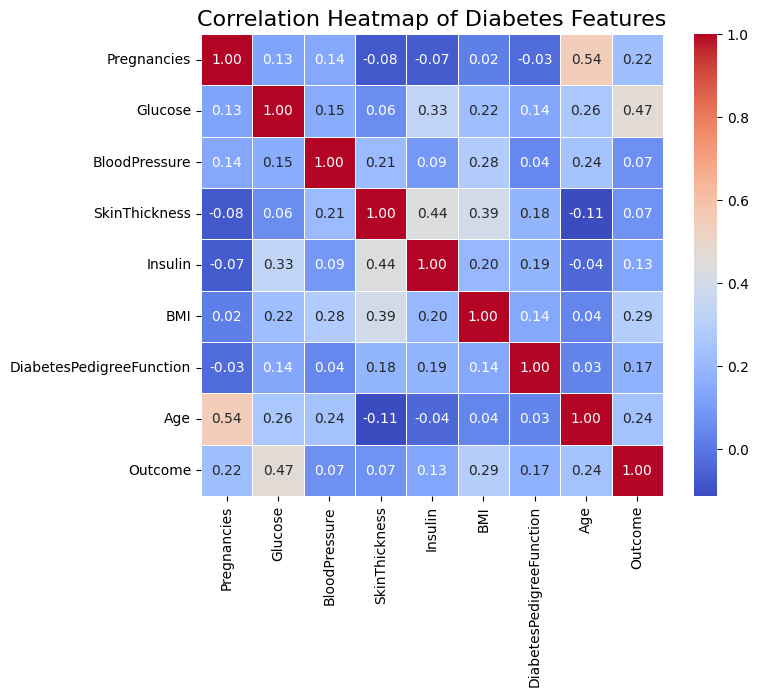

In [18]:
# correlation heatmap
# Understand relationships between variables
# Detect multicollinearity (important before modeling)
# Identify strong predictors of the target variable (Outcome)

# Compute correlation matrix: which measures linear relationships between numerical variables.
corr = diabetes_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='coolwarm',  linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Features", fontsize=16)
plt.show()

In [19]:
#  Insights from the Heatmap
# Glucose, BMI, Age show stronger positive correlation with diabetes outcome. These are likely to be important predictors
# BloodPressure, SkinThickness show weak correlations	May contribute less to prediction

# Use in Machine Learning: Feature selection: Choose features with stronger correlation to the target.

In [20]:
# To highlight only correlation with the target variable:
corr_target = corr['Outcome'].drop('Outcome').sort_values(ascending=False)
print(corr_target)


Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [21]:
# feature Selection: choosing the most relevant variables for your machine learning model.

# Why Feature Selection Matters
# Improves model performance
# Reduces overfitting
# Speeds up training time
# Makes models easier to interpret

In [22]:
# Feature Selection Methods

# 1. Correlation with Target (Outcome)
# Rule of Thumb: Keep features with |correlation| > 0.2 with Outcome.

# Correlation with the target only
target_corr = corr['Outcome'].drop('Outcome').sort_values(ascending=False)

# Display highly correlated features
print("Features with correlation > 0.2 with Outcome:")

print(target_corr[target_corr.abs() > 0.2])

Features with correlation > 0.2 with Outcome:
Glucose        0.466581
BMI            0.292695
Age            0.238356
Pregnancies    0.221898
Name: Outcome, dtype: float64


In [23]:
# feature engineering, train/test split, modeling.

In [24]:
#Identify Features with Invalid Zero Values
diabetes_df.eq(0).sum()

# Features where 0 is NOT a valid value
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zero values
diabetes_df[invalid_zero_columns].eq(0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [25]:
#Imputation Strategy
# Median is preferred over mean in medical data due to skewness and outliers.
# Impute Missing (Zero) Values

# Replace 0 with NaN for specified columns
diabetes_df[invalid_zero_columns] = diabetes_df[invalid_zero_columns].replace(0, np.nan)

# Impute missing values with median
for col in invalid_zero_columns:
    median_value = diabetes_df[col].median()
    diabetes_df[col].fillna(median_value, inplace=True)


C:\Users\samsy\AppData\Local\Temp\ipykernel_35180\3869906542.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df[col].fillna(median_value, inplace=True)
C:\Users\samsy\AppData\Local\Temp\ipykernel_35180\3869906542.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [26]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [27]:
# Verify Imputation
diabetes_df[invalid_zero_columns].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [28]:
# Best Practice
#Check Distribution Before Imputation : Avoid skewing the data — visualize histograms.
# Don’t use test data stats in production
# Try Imputing With Domain Knowledge	In health datasets, domain knowledge is crucial — e.g., Glucose = 0 is not just missing, it's invalid.

# Dataset => Data Preprocessing technique => Feature selection => Model Training & Ensenble models => Model Eveluation => Deployment

In [29]:
# Feature selection: Picking the the most important feature for your ML
# We can use correlation matrix to pick the most important feature
# Correlation Matrix measure the linear relationship between the target and the feature
# Helps visualize which features are strongly correlated with outcome

# Random forest feature importance: Captures both linear and non-linear relationship

#SelectkBest (Statistical Filtering): Selects top k features using univariate statistical tests (ANOVA F-Test)

#Recursive Feature Technique

#Forward and Backward Selection

In [30]:
#What Is Feature Scaling? 
# Feature scaling transforms numeric variables to be on similar scales, which helps models learn better.

# Common Scalling methods
# StandardScaler	Mean = 0, SD = 1	Default; widely used x = x - mean/sd - 1
# MinMaxScaler	[0, 1]	Normalizes to unit range
# RobustScaler	Uses median and IQR	Best for outliers

In [31]:
# Select Features to Scale
# We'll exclude the target column Outcome, and scale only the input features.
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Now, all features have mean ~0 and std deviation ~1.

X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [32]:
# Scale Selected Features To deploy
new_scaler = StandardScaler()

x_selected_features = diabetes_df[['Glucose', 'BMI', 'Age', 'Pregnancies']]

# x_selected_features
y_new = diabetes_df['Outcome']

x_scaled_selected_feature = new_scaler.fit_transform(x_selected_features)

x_scaled_selected_feature

array([[ 0.86604475,  0.16661938,  1.4259954 ,  0.63994726],
       [-1.20506583, -0.85219976, -0.19067191, -0.84488505],
       [ 2.01666174, -1.33250021, -0.10558415,  1.23388019],
       ...,
       [-0.02157407, -0.910418  , -0.27575966,  0.3429808 ],
       [ 0.14279979, -0.34279019,  1.17073215, -0.84488505],
       [-0.94206766, -0.29912651, -0.87137393, -0.84488505]],
      shape=(768, 4))

In [33]:
x_scaled_selected_feature_df = pd.DataFrame(x_scaled_selected_feature, columns=['Glucose', 'BMI', 'Age', 'Pregnancies'])

x_scaled_selected_feature_df


,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [34]:
y_new

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
x_new = x_scaled_selected_feature_df

x_new

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [36]:
from sklearn.model_selection import train_test_split

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

new_model = LogisticRegression()

# Initialize and train the model
new_model.fit(x_new_train, y_new_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
# Make prediction
# Predict Classes
new_y_pred = new_model.predict(x_new_test)

# Predict probability
new_y_prob = new_model.predict_proba(x_new_test)[:, 1]

In [39]:
import joblib 

# Save the trained model
joblib.dump(new_model, 'new_diabetes_model.pkl')

# Save the scaled value
joblib.dump(new_scaler, 'new_scaler.pkl')

['new_scaler.pkl']

In [40]:
X_scaled_df = pd.DataFrame(X_scaled, columns=diabetes_df.columns[:-1])

In [41]:
X_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [42]:
# Use MinMaxScaler
# This will scale all features to between 0 and 1.

In [43]:
# Best Practices
# Scale after imputing missing values	Otherwise 0s will distort scaling
# Scale only training data when deploying	Avoid data leakage into test set
# Use StandardScaler for most ML models	Especially when feature distributions are not highly skewed

In [44]:
# 
selected_features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
X_selected = X_scaled_df[selected_features]

X_selected

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [45]:
# Building and evaluating a machine learning model

# Logistic Regression, a widely used and interpretable model for binary classification 
# (like predicting diabetes: Outcome = 0 or 1).

In [46]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Selected features and target
X = X_scaled_df[['Glucose', 'BMI', 'Age', 'Pregnancies']]
y = y

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train

,Glucose,BMI,Age,Pregnancies
60,-1.237941,-0.022590,-1.041549,-0.547919
618,-0.317447,-0.619327,1.425995,1.530847
346,0.570172,-0.546554,-0.956462,-0.844885
294,1.293417,-1.536264,2.702312,-1.141852
231,0.405798,2.000494,1.085644,0.639947
...,...,...,...,...
71,0.570172,-0.561109,-0.616111,0.342981
106,-0.843443,-1.463491,-0.531023,-0.844885
270,-0.679069,1.913166,0.404942,1.827813
435,0.635921,1.447421,-0.360847,-1.141852


In [48]:
X_test

,Glucose,BMI,Age,Pregnancies
668,-0.777694,0.224838,0.830381,0.639947
324,-0.317447,0.472265,-1.041549,-0.547919
624,-0.448946,-0.240908,-1.041549,-0.547919
690,-0.481821,-1.143291,0.064591,1.233880
473,0.471547,-0.371899,1.425995,0.936914
...,...,...,...,...
355,1.424916,-0.299127,1.340908,1.530847
534,-1.468064,0.122956,-0.786286,-0.844885
344,-0.876318,0.632365,2.021610,1.233880
296,0.800295,-0.648436,-0.360847,-0.547919


In [49]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize and train
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
# Make Predictions
# Predict probabilities and classes
y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]


In [51]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [52]:
Y_pred_df = pd.DataFrame(y_pred)

In [53]:
y_prob

array([0.25579595, 0.20408247, 0.12102518, 0.13778241, 0.52933092,
       0.46030947, 0.01314177, 0.3108032 , 0.5686889 , 0.76928725,
       0.25109327, 0.91149284, 0.44595395, 0.22409957, 0.05327724,
       0.26901957, 0.13071534, 0.07517433, 0.7226239 , 0.5612476 ,
       0.21652358, 0.08541402, 0.49639655, 0.09757792, 0.58074501,
       0.88542952, 0.11172655, 0.03828635, 0.33732138, 0.11056647,
       0.88911809, 0.83757459, 0.84381381, 0.58512552, 0.56168284,
       0.66786378, 0.93905195, 0.20007758, 0.49111052, 0.51437214,
       0.06161694, 0.43642666, 0.49214117, 0.30295735, 0.04182998,
       0.5249423 , 0.48918661, 0.20323148, 0.26539077, 0.94371035,
       0.05039621, 0.66616177, 0.85188896, 0.22909116, 0.12940938,
       0.04170574, 0.7569194 , 0.06285423, 0.34223169, 0.75136749,
       0.70994581, 0.32685824, 0.289586  , 0.18511305, 0.10457551,
       0.62409964, 0.04331984, 0.81542701, 0.03587661, 0.82017547,
       0.69555194, 0.07883312, 0.16572417, 0.13982145, 0.09219

In [54]:
# y_pred:
# The final binary class predictions (0 or 1) made by the model.
# These are threshold-based decisions — if the probability is ≥ 0.5, it predicts 1, otherwise 0 by default.

# So, for each patient:
# 1 means the model predicts diabetic
# 0 means the model predicts non-diabetic

# y_prob:
# The probability estimates for class 1 (i.e., having diabetes).
# These are continuous values between 0 and 1 and come from:

# A value of 0.85 means an 85% confidence the person is diabetic.
# A value of 0.23 means a 23% confidence.

# By default, LogisticRegression uses threshold = 0.5 to convert probabilities to class predictions.

In [55]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
F1 Score: 0.6538461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [56]:
# Interpreting Metrics
# Accuracy:	The percentage of all predictions the model got right.
# Out of all patients tested, X% were correctly predicted as diabetic or not diabetic."
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# True Positive (TP)	Model predicted 1 (diabetic) and actual label was also 1
# True Negative (TN)	Model predicted 0 (non-diabetic) and actual label was also 0
# False Positive (FP)	Model predicted 1, but actual label was 0 (a "false alarm")
# False Negative (FN)	Model predicted 0, but actual label was 1 (missed a real diabetic case)

# Summary
#  Accuracy means:
# "What fraction of the total predictions were correct, whether for diabetic or non-diabetic patients."

# Metric	            What It Counts	                    Example Meaning
# True Positive (TP)	Correctly predicted diabetic	    "Model said diabetic, and patient is"
# True Negative (TN)	Correctly predicted non-diabetic	"Model said not diabetic, and patient isn't"
# accuracy_score	(TP + TN) / Total	% of all correct predictions

# What is precision_score?
# Precision	% of predicted positives that are actual positives i.e Of all patients the model said "has diabetes", how many actually had it?
# "If the model says you're diabetic, precision tells you how likely that prediction is true."
# Formula
# Precision = TP / (TP + FP)
    # Where:
    # TP (True Positive): Model said "diabetic" → and it was correct
    # FP (False Positive): Model said "diabetic" → but it was wrong

# Low Precision Means?
# The model is predicting many people as diabetic who are not (high false positives).
    # This could lead to:
    # Unnecessary medical interventions
    # Reduced trust in your model

# What is recall_score?
# Recall	: Of all actual diabetic patients, how many did the model correctly detect? i.e "Recall shows how well the model catches actual diabetes cases."
# % of actual positives correctly identified

# Formula: 
    # Recall = TP / (TP + FN)
# Where:
#     TP (True Positive): Model said “diabetic” → and it was correct
#     FN (False Negative): Model said “not diabetic” → but patient was diabetic

# What is F1_Score
# The F1 Score is the harmonic mean of Precision and Recall.
# F1 Score	Balance between precision and recall. A balance between precision and recall — especially useful when you want to consider both equally. "F1 tells you the overall quality of the positive (diabetic) predictions."
# Formula = 2 * ((Precision × Recall)/ (Precision + Recall))

# Application
    # High F1 Score → Your model is reliable in identifying diabetic patients without over-predicting.
    # It's a balanced metric when you care equally about precision and recall.

# Classification Report
# Precision, Recall, F1-score for each class (0 and 1)
# Support: how many actual instances there are per class

# Interpretation:
# Class 0 (non-diabetic): model is strong
# Class 1 (diabetic): model struggles more — might be under-predicting diabetic cases (low recall)

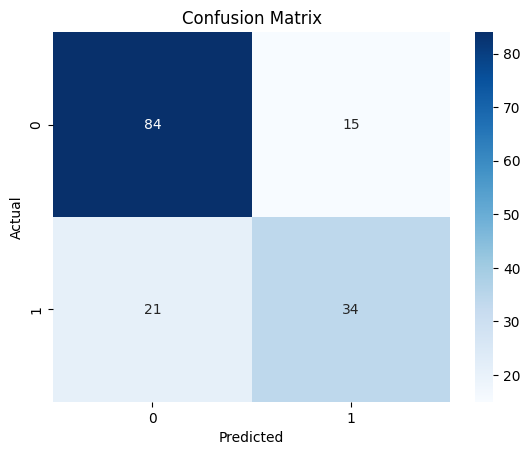

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\samsy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [59]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\samsy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [60]:
# What is a Confusion Matrix?
# A confusion matrix is a table that shows the number of:
    # Correct and Incorrect predictions
    # For each class (e.g., diabetic vs. non-diabetic)



In [61]:
import joblib

In [62]:
# Save the trained model
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [63]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [64]:
X_scaled = scaler.fit_transform(X)

In [65]:
X_scaled

array([[ 0.86604475,  0.16661938,  1.4259954 ,  0.63994726],
       [-1.20506583, -0.85219976, -0.19067191, -0.84488505],
       [ 2.01666174, -1.33250021, -0.10558415,  1.23388019],
       ...,
       [-0.02157407, -0.910418  , -0.27575966,  0.3429808 ],
       [ 0.14279979, -0.34279019,  1.17073215, -0.84488505],
       [-0.94206766, -0.29912651, -0.87137393, -0.84488505]],
      shape=(768, 4))

In [66]:
new_scaler = StandardScaler()

x_selected_features = diabetes_df[['Glucose', 'BMI', 'Age', 'Pregnancies']]



In [67]:
y_new = diabetes_df['Outcome']

x_scaled_selected_feature = new_scaler.fit_transform(x_selected_features)

x_scaled_selected_feature

array([[ 0.86604475,  0.16661938,  1.4259954 ,  0.63994726],
       [-1.20506583, -0.85219976, -0.19067191, -0.84488505],
       [ 2.01666174, -1.33250021, -0.10558415,  1.23388019],
       ...,
       [-0.02157407, -0.910418  , -0.27575966,  0.3429808 ],
       [ 0.14279979, -0.34279019,  1.17073215, -0.84488505],
       [-0.94206766, -0.29912651, -0.87137393, -0.84488505]],
      shape=(768, 4))

In [68]:
x_scaled_selected_feature_df = pd.DataFrame(x_scaled_selected_feature, columns=['Glucose', 'BMI', 'Age', 'Pregnancies'])

x_scaled_selected_feature_df

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [69]:
x_new = x_scaled_selected_feature_df

x_new

,Glucose,BMI,Age,Pregnancies
0,0.866045,0.166619,1.425995,0.639947
1,-1.205066,-0.852200,-0.190672,-0.844885
2,2.016662,-1.332500,-0.105584,1.233880
3,-1.073567,-0.633881,-1.041549,-0.844885
4,0.504422,1.549303,-0.020496,-1.141852
...,...,...,...,...
763,-0.679069,0.064737,2.532136,1.827813
764,0.011301,0.632365,-0.531023,-0.547919
765,-0.021574,-0.910418,-0.275760,0.342981
766,0.142800,-0.342790,1.170732,-0.844885


In [70]:
from sklearn.model_selection import train_test_split

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression

new_model = LogisticRegression()

#initialize and train the model
new_model.fit(x_new_train, y_new_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
#make prediction
#predict Classes
new_y_pred = new_model.predict(x_new_test)

#predict probability
new_y_prob = new_model.predict_proba(x_new_test)[:, 1]

In [73]:
import joblib

#save the trained model
joblib.dump(new_model, 'new_diabetes_model.pkl')

#save the scaled value
joblib.dump(new_scaler, 'new_scaler.pkl')

['new_scaler.pkl']